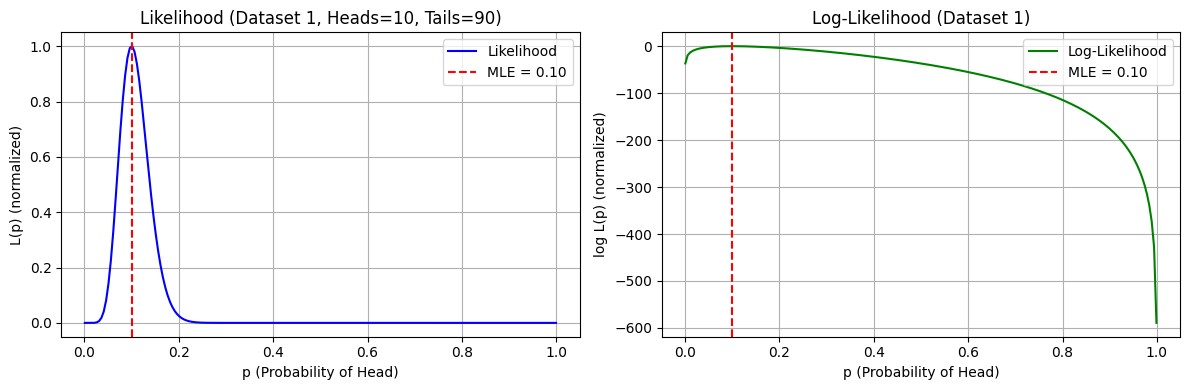

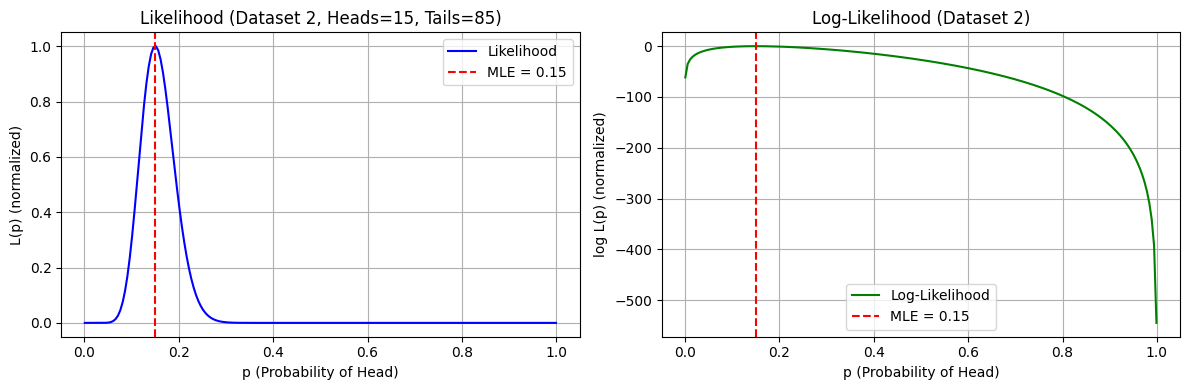

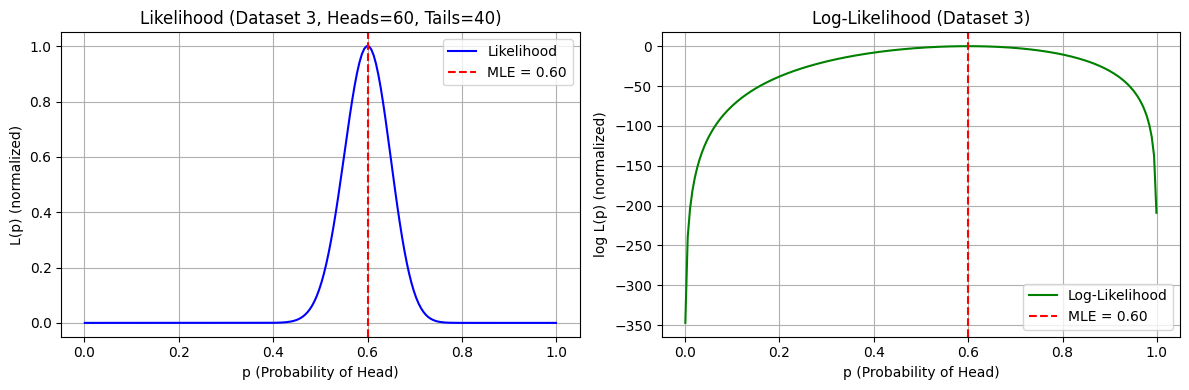

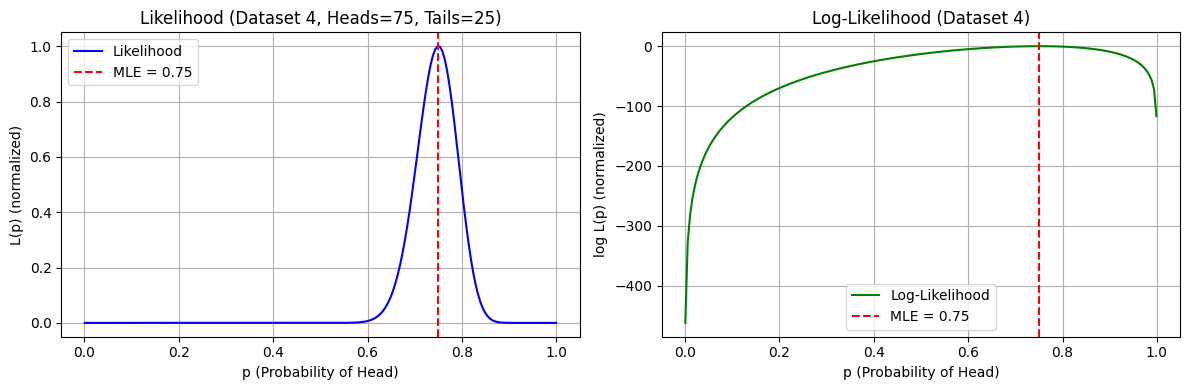

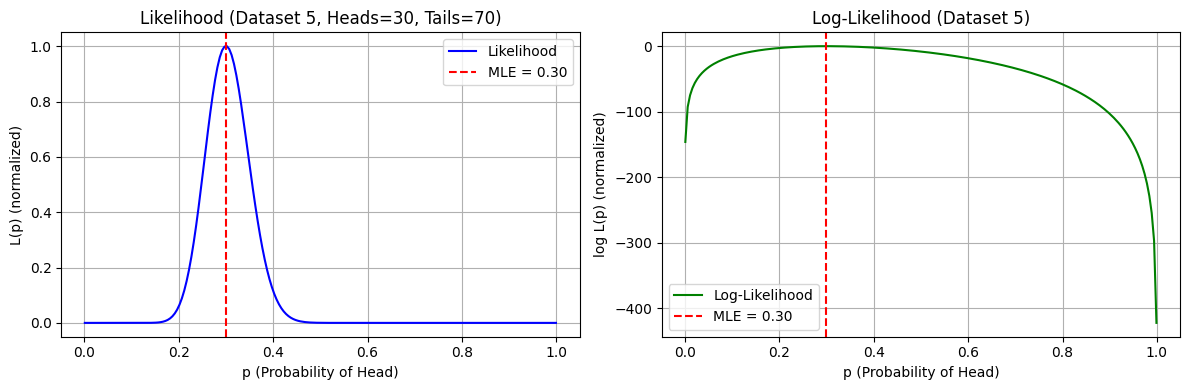

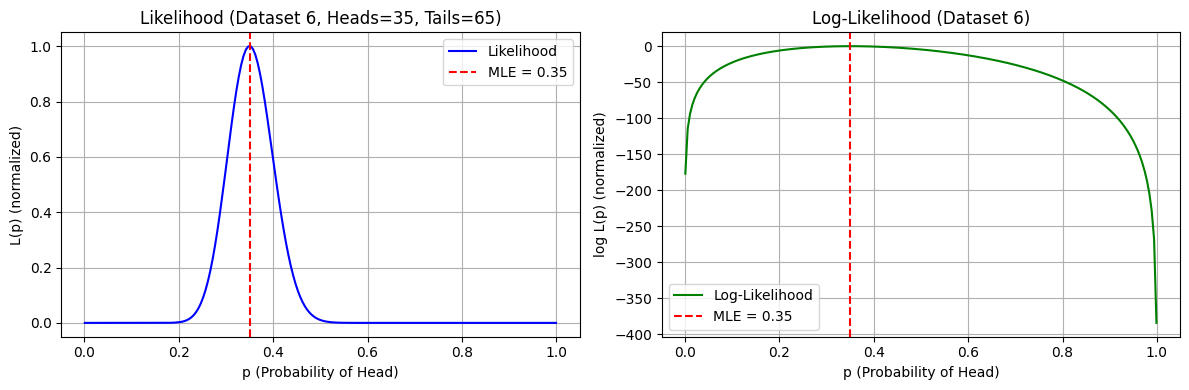

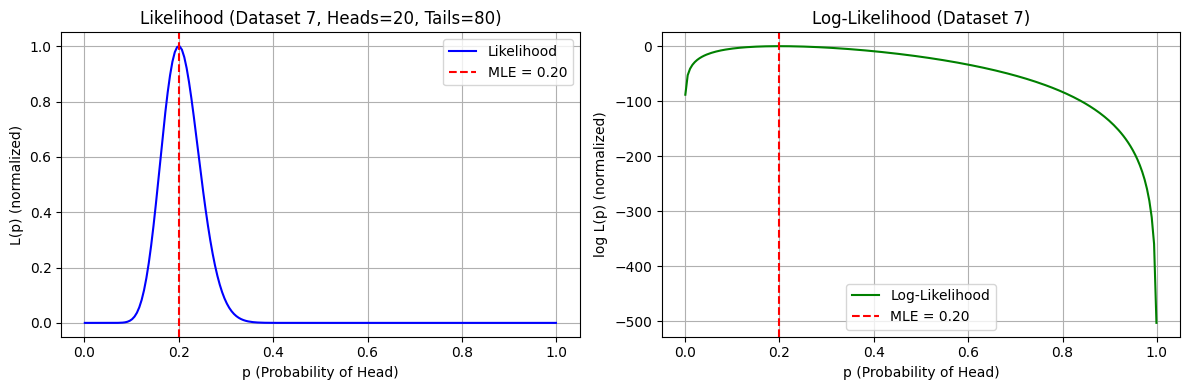

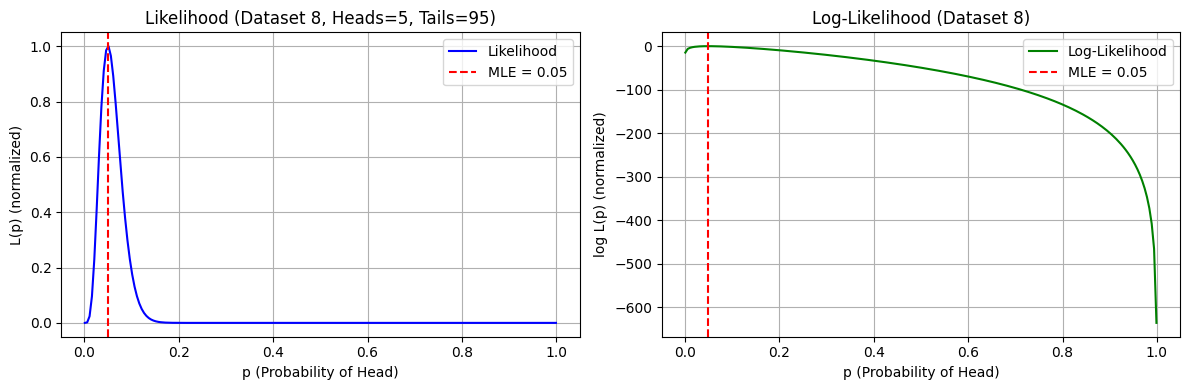

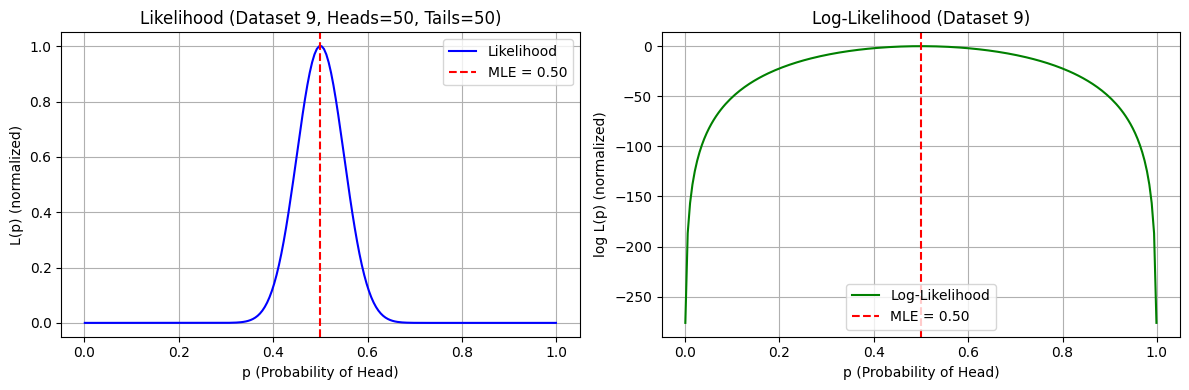

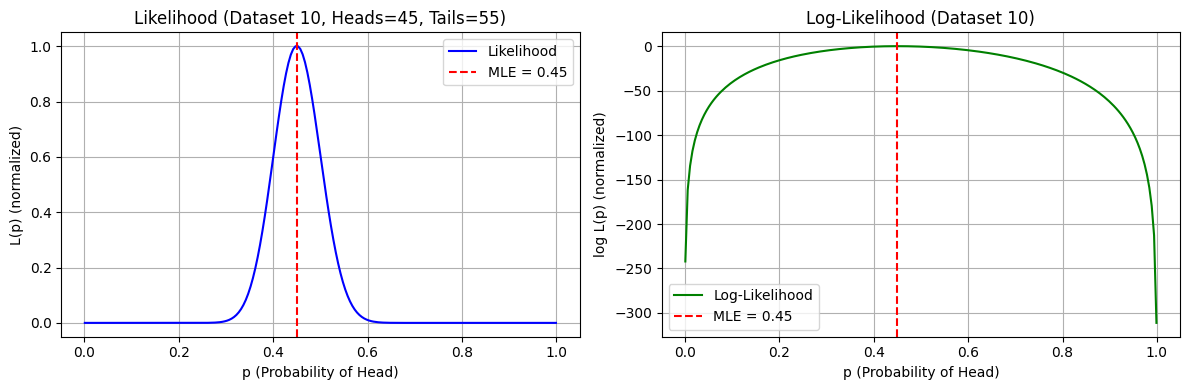

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_likelihood(datasets, head_value, tail_value):
    """
    Plots likelihood and log-likelihood functions for multiple datasets of coin tosses.
    
    Parameters:
    - datasets: list of lists, each dataset = sequence of coin flips (any labels)
    - head_value: the value in dataset that represents HEAD (e.g., "H" or 1)
    - tail_value: the value in dataset that represents TAIL (e.g., "T" or 0)
    """
    
    p_values = np.linspace(0.001, 0.999, 200)  # avoid log(0)
    
    for idx, data in enumerate(datasets, 1):
        k = sum(1 for x in data if x == head_value)   # number of heads
        n = len(data)                                 # total trials
        
        # Likelihood
        likelihood = (p_values**k) * ((1 - p_values)**(n - k))
        likelihood /= likelihood.max()  # normalize
        
        # Log-likelihood
        log_likelihood = k*np.log(p_values) + (n-k)*np.log(1 - p_values)
        log_likelihood -= log_likelihood.max()  # normalize for better comparison
        
        # MLE estimate
        p_hat = k / n if n > 0 else 0
        
        # Plot side-by-side
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))
        
        # Likelihood plot
        axs[0].plot(p_values, likelihood, color="blue", label="Likelihood")
        axs[0].axvline(p_hat, color="red", linestyle="--", label=f"MLE = {p_hat:.2f}")
        axs[0].set_title(f"Likelihood (Dataset {idx}, Heads={k}, Tails={n-k})")
        axs[0].set_xlabel("p (Probability of Head)")
        axs[0].set_ylabel("L(p) (normalized)")
        axs[0].legend()
        axs[0].grid(True)
        
        # Log-likelihood plot
        axs[1].plot(p_values, log_likelihood, color="green", label="Log-Likelihood")
        axs[1].axvline(p_hat, color="red", linestyle="--", label=f"MLE = {p_hat:.2f}")
        axs[1].set_title(f"Log-Likelihood (Dataset {idx})")
        axs[1].set_xlabel("p (Probability of Head)")
        axs[1].set_ylabel("log L(p) (normalized)")
        axs[1].legend()
        axs[1].grid(True)
        
        plt.tight_layout()
        plt.show()


# ---------------- EXAMPLE USAGE ----------------
datasets = [
    ["H"]*10 + ["T"]*90,
    ["H"]*15 + ["T"]*85,
    ["H"]*60 + ["T"]*40,             
    ["H"]*75 + ["T"]*25,            
    ["H"]*30 + ["T"]*70,            
    ["H"]*35 + ["T"]*65,             
    ["H"]*20 + ["T"]*80,             
    ["H"]*5 + ["T"]*95 ,             
    ["H"]*50 + ["T"]*50,              
    ["H"]*45 + ["T"]*55,            
]

plot_likelihood(datasets, head_value="H", tail_value="T")
